# Open Exploration (Disaggregated Outcomes)

... [add NB description] ...

**Notebook Outline**
1. [Model and Dependency Import](#1-model-and-dependency-import)  
2. [Dike Model Simulation](#2-dike-model-simulation)  
3. [Global Sensitivity Analysis](#3-global-sensitivity-analysis)  
4. [Scenario Discovery](#4-scenario-discovery)

## 1. Model and dependency import

In [1]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ema_workbench import (Scenario, Policy, MultiprocessingEvaluator, perform_experiments, ema_logging)
from ema_workbench import Samplers
from ema_workbench import save_results, load_results
from ema_workbench.analysis import feature_scoring
from ema_workbench.analysis.scenario_discovery_util import RuleInductionType
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from SALib.analyze import sobol
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

# Model
from problem_formulation import get_model_for_problem_formulation

In [3]:
prob_formulation = 1

model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

In [4]:
len(uncertainties), len(levers)

(18, 21)

In [5]:
ema_logging.log_to_stderr(ema_logging.INFO)

D = len(model.levers)
N = 100  
n_scenario = 1
n_policy = N * (2 * D + 2)

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.SOBOL
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
/opt/anaconda3/envs/school/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 1 scenarios * 193600 policies * 1 model(s) = 193600 experiments
100%|████████████████████████████████| 193600/193600 [2:44:14<00:00, 19.65it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF1_S1_P4400_.tar.gz


In [ ]:
ema_logging.log_to_stderr(ema_logging.INFO)

prob_formulation = 6
n_scenario = 1000
n_policy = 100

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            lever_sampling=Samplers.LHS
                                            )

save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

In [2]:
# Initialize Model
prob_formulation = 1
n_scenario = 50
n_policy = 50

model, steps = get_model_for_problem_formulation(prob_formulation)
uncertainties = model.uncertainties
levers = model.levers

In [3]:
len(uncertainties), len(levers)

(18, 21)

Uncertainties and Policies value ranges are already set in problem_formulation.py

In [4]:
ema_logging.log_to_stderr(ema_logging.INFO)

with MultiprocessingEvaluator(model, n_processes=4) as evaluator:
    results = evaluator.perform_experiments(scenarios=n_scenario,
                                            policies=n_policy,
                                            uncertainty_sampling=Samplers.SOBOL)
    
save_results(results, 'results/GSA_PF{}_S{}_P{}_.tar.gz'.format(prob_formulation,n_scenario,n_policy))

[MainProcess/INFO] pool started with 4 workers
/opt/anaconda3/envs/school/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
[MainProcess/INFO] performing 1900 scenarios * 50 policies * 1 model(s) = 95000 experiments
100%|██████████████████████████████████| 95000/95000 [1:14:45<00:00, 21.18it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to /Users/racheldelvin/Desktop/epa141a-flood-policy-optimization-overijssel/final assignment/results/GSA_PF1_S50_P50_.tar.gz


In [5]:
experiments, outcomes = results

In [ ]:
outcomes

{'Expected Annual Damage': array([35160052.90064293, 33275607.7323727 , 35160052.90064293,
        35160052.90064293, 35160052.90064293, 35160052.90064293,
        35160052.90064293, 75935055.780017  , 35160052.90064293,
        35160052.90064293,  2129956.59135193, 35160052.90064293,
        35160052.90064293, 35160052.90064293, 35160052.90064293,
        35160052.90064293, 35160052.90064293, 35160052.90064293,
        35047616.54683463, 38296922.84048064, 13228424.24593195,
        13228424.24593195, 13228424.24593195, 13228424.24593195,
        13228424.24593195,   902706.71124907, 13228424.24593195,
        13228424.24593195, 46227116.76196779, 13228424.24593195,
        13228424.24593195, 13228424.24593195, 13228424.24593195,
        13228424.24593195, 13228424.24593195, 13228424.24593195,
        14598899.5794874 , 13228424.24593195]),
 'Total Investment Costs': array([1.78818361e+09, 1.78818357e+09, 1.78818361e+09, 1.78818361e+09,
        1.78818361e+09, 1.78818361e+09, 1.788183

In [10]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,policy,model
0,35,200.708465,1.5,0.632905,84.898372,10.0,0.083071,254.519537,1.5,0.487378,...,10,0,2,3,4,4,2,50,0,dikesnet
1,70,200.708465,1.5,0.632905,84.898372,10.0,0.083071,254.519537,1.5,0.487378,...,10,0,2,3,4,4,2,51,0,dikesnet
2,35,228.560452,1.5,0.632905,84.898372,10.0,0.083071,254.519537,1.5,0.487378,...,10,0,2,3,4,4,2,52,0,dikesnet
3,35,200.708465,1.0,0.632905,84.898372,10.0,0.083071,254.519537,1.5,0.487378,...,10,0,2,3,4,4,2,53,0,dikesnet
4,35,200.708465,1.5,0.073123,84.898372,10.0,0.083071,254.519537,1.5,0.487378,...,10,0,2,3,4,4,2,54,0,dikesnet


In [21]:
problem = get_SALib_problem(levers)
problem

{'num_vars': 21,
 'names': ['0_RfR 0',
  '0_RfR 1',
  '1_RfR 0',
  '1_RfR 1',
  '2_RfR 0',
  '2_RfR 1',
  '3_RfR 0',
  '3_RfR 1',
  '4_RfR 0',
  '4_RfR 1',
  'A.1_DikeIncrease 0',
  'A.1_DikeIncrease 1',
  'A.2_DikeIncrease 0',
  'A.2_DikeIncrease 1',
  'A.3_DikeIncrease 0',
  'A.3_DikeIncrease 1',
  'A.4_DikeIncrease 0',
  'A.4_DikeIncrease 1',
  'A.5_DikeIncrease 0',
  'A.5_DikeIncrease 1',
  'EWS_DaysToThreat'],
 'bounds': [(0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 2),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 11),
  (0, 5)]}

In [23]:
outcome_var = 'Expected Number of Deaths'
casualties_sobol = outcomes[outcome_var]

In [16]:
outcome_var = 'Expected Number of Deaths'

casualties_sobol = outcomes[outcome_var][:]
casualties_mean_sobol = np.mean(outcomes[outcome_var][:])
casualties_std_sobol = np.std(outcomes[outcome_var][:])

In [24]:
casualties_sobol

array([0.02010169, 0.0201264 , 0.02010169, ..., 0.00184217, 0.00184217,
       0.00184217])

In [26]:
Si = sobol.analyze(problem,
                   Y=casualties_sobol,
                   calc_second_order=True,
                   print_to_console=True)

RuntimeError: 
        Incorrect number of samples in model output file.
        Confirm that calc_second_order matches option used during sampling.

## 2. Dike Model Simulation

### 2.1 Sampling in the scenario (uncertainty) space

Systematically vary uncertain factors while keeping policy levers fixed, to analyze their impact on disaggregated outcomes (problem formulation 6).

In [ ]:
# 

### 2.2 Sampling in the policy (lever) space

Systematically vary policy levers while keeping the scenario (uncertainties) fixed, to analyze their impact on disaggregated outcomes (problem formulation 6).

In [ ]:
######## Problem Formulation
pf = 6
n_scenario = 1
n_policy = 256

######## Initialize Model
model, steps = get_model_for_problem_formulation(pf)
uncertainties = model.uncertainties
levers = model.levers

######## Reference Scenario (Most Likely)
ref_dict = {'A.1_Bmax':170,
            'A.1_Brate':1.5,
            'A.1_pfail':0.5,
            'A.2_Bmax':170,
            'A.2_Brate':1.5,
            'A.2_pfail':0.5,
            'A.3_Bmax':170,
            'A.3_Brate':1.5,
            'A.3_pfail':0.5,
            'A.4_Bmax':170,
            'A.4_Brate':1.5,
            'A.4_pfail':0.5,
            'A.5_Bmax':170,
            'A.5_Brate':1.5,
            'A.5_pfail':0.5,
            'A.0_ID flood wave shape': 4,
            'discount rate 0': 3.5,
            'discount rate 1': 3.5,}

ref_scenario = [Scenario('reference', **ref_dict)]

######## Run Model
ema_logging.log_to_stderr(ema_logging.INFO)
with MultiprocessingEvaluator(model, n_processes=6) as evaluator:
    results = evaluator.perform_experiments(scenarios=ref_scenario, policies=n_policy, lever_sampling=Samplers.SOBOL)

save_results(results, 'results/data/GSA_PF{}_S{}_P{}_.tar.gz'.format(pf, n_scenario, n_policy))

[MainProcess/INFO] pool started with 6 workers
[MainProcess/INFO] performing 1 scenarios * 11264 policies * 1 model(s) = 11264 experiments
100%|████████████████████████████████████| 11264/11264 [03:36<00:00, 52.12it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool
[MainProcess/INFO] results saved successfully to d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S1_P256_.tar.gz


## 3. Global Sensitivity Analysis

### 3.1 Feature Scoring of Scenario Space

In [ ]:
######## Problem Formulation
pf, n_scenario, n_policy = 6, 20000, 1 

model, steps = get_model_for_problem_formulation(pf)
uncertainties = model.uncertainties
levers = model.levers

######## Load results
results = load_results('results/data/GSA_PF{}_S{}_P{}_.tar.gz'.format(pf, n_scenario, n_policy))
experiments, outcomes = results

######## drop levers
experiments.drop(columns=list(model.levers.keys()), inplace=True)

[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S20000_P1_.tar.gz


In [ ]:
experiments.head()

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_Brate,A.4_pfail,A.5_Bmax,A.5_Brate,A.5_pfail,discount rate 0,discount rate 1,scenario,policy,model
0,15,104.951766,1.5,0.866037,72.423761,1.5,0.784919,260.727340,1.0,0.427487,...,10.0,0.746491,329.289172,1.0,0.326723,4.5,1.5,26264,policy 1,dikesnet
1,27,268.758784,1.0,0.439213,179.347355,10.0,0.250512,98.160975,1.0,0.125769,...,1.5,0.920575,224.384026,10.0,0.931482,4.5,1.5,26265,policy 1,dikesnet
2,120,274.597925,10.0,0.752513,174.253795,1.5,0.358975,219.550772,10.0,0.254221,...,1.0,0.564166,66.633747,10.0,0.731416,3.5,4.5,26266,policy 1,dikesnet
3,51,229.349571,10.0,0.308457,76.893599,10.0,0.470869,223.435463,10.0,0.801025,...,10.0,0.340353,177.164724,10.0,0.544277,2.5,4.5,26267,policy 1,dikesnet
4,10,302.133282,1.0,0.202844,255.568891,10.0,0.264802,326.750685,10.0,0.798309,...,10.0,0.937984,200.450219,1.5,0.543679,1.5,2.5,26268,policy 1,dikesnet


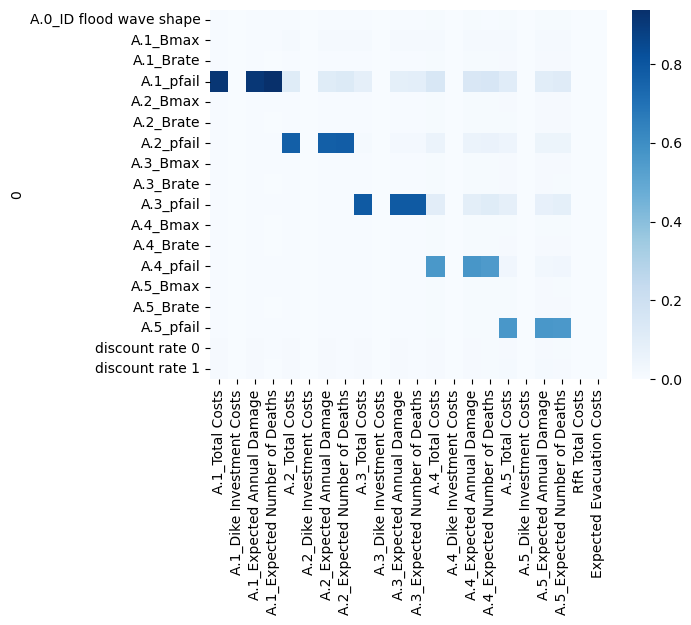

In [ ]:
import matplotlib.pyplot as plt

scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)
ax = sns.heatmap(scores, annot=False, cmap = "Blues", fmt=".2f")

### 3.2 Feature Scoring of Policy Space

In [ ]:
######## Problem Formulation
pf, n_scenario, n_policy = 6, 1, 256

model, steps = get_model_for_problem_formulation(pf)
uncertainties = model.uncertainties
levers = model.levers

######## Load results
results = load_results('results/data/GSA_PF{}_S{}_P{}_.tar.gz'.format(pf, n_scenario, n_policy))
experiments, outcomes = results

######## drop uncertainties
experiments.drop(columns=list(model.uncertainties.keys())+['policy'], inplace=True)

[MainProcess/INFO] results loaded successfully from d:\GitHub\epa141a-flood-policy-optimization-overijssel\final assignment\results\data\GSA_PF6_S1_P256_.tar.gz


In [ ]:
experiments.head()

,0_RfR 0,0_RfR 1,1_RfR 0,1_RfR 1,2_RfR 0,2_RfR 1,3_RfR 0,3_RfR 1,4_RfR 0,4_RfR 1,...,A.2_DikeIncrease 1,A.3_DikeIncrease 0,A.3_DikeIncrease 1,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.5_DikeIncrease 0,A.5_DikeIncrease 1,EWS_DaysToThreat,scenario,model
0,0,0,1,1,0,1,1,0,0,1,...,2,7,2,2,8,1,7,3,reference,dikesnet
1,1,0,1,1,0,1,1,0,0,1,...,2,7,2,2,8,1,7,3,reference,dikesnet
2,0,0,1,1,0,1,1,0,0,1,...,2,7,2,2,8,1,7,3,reference,dikesnet
3,0,0,0,1,0,1,1,0,0,1,...,2,7,2,2,8,1,7,3,reference,dikesnet
4,0,0,1,0,0,1,1,0,0,1,...,2,7,2,2,8,1,7,3,reference,dikesnet


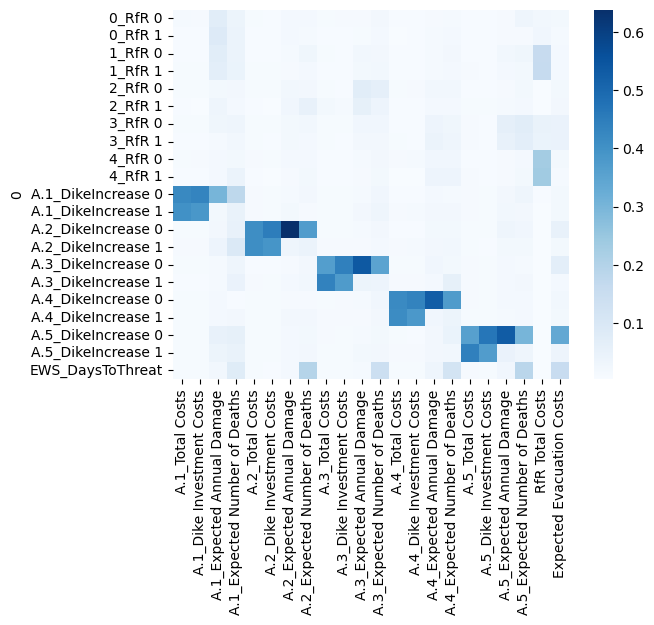

In [ ]:
import matplotlib.pyplot as plt

scores = feature_scoring.get_feature_scores_all(experiments, outcomes, mode=RuleInductionType.REGRESSION)
ax = sns.heatmap(scores, annot=False, cmap = "Blues", fmt=".2f")

In [ ]:
import seaborn as sns
from ema_workbench.analysis import parcoords

# Set color palette to account for policy number
custom_palette = sns.color_palette(n_colors=n_scenario)

# Select outcomes of interest
to_display = list(outcomes.keys())
# Create a DataFrame from outcomes, aligning with experiments' index
data = pd.DataFrame(outcomes, index=experiments.index)

# Set limits
limits = parcoords.get_limits(data)
limits.loc[0, to_display] = 0

paraxes = parcoords.ParallelAxes(limits)
# Plot all data in grey
paraxes.plot(data, color='grey', alpha=0.05)

# Plot each scenario with its own color
for i, scenario in enumerate(experiments['scenario']):
    color = custom_palette[i % len(custom_palette)]
    paraxes.plot(data[experiments['scenario'] == scenario], color=color, label=f'Scenario {scenario}')

paraxes.legend()
plt.show()

c:\Users\Move\anaconda3\envs\abm24\Lib\site-packages\ema_workbench\analysis\parcoords.py:220: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout(h_pad=0, w_pad=0)


## 4. Scenario Discovery

#### TO IMPROVE THE OPEN EXPLORATION
1. test policies with more reference scenarios